In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\navne\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv(r'C:\Users\navne\Documents\Python Scripts\Data\shampoo sales.csv', header=0, parse_dates=True, index_col='Month')


In [4]:
series.head()

,Sales of shampoo
Month,
2018-01-01,266.0
2018-01-02,145.9
2018-01-03,183.1
2018-01-04,119.3
2018-01-05,180.3


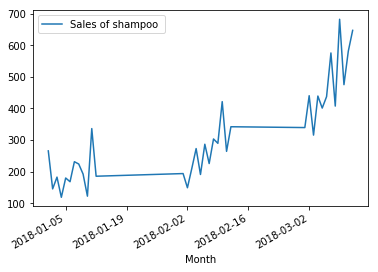

In [5]:
# plotting the data as a time series 
series.plot()
pyplot.show()

From here we can see that Shampoo sales data has a clear trend, that means time series is not stationary and will require differencing to make it stationary.

In [6]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\navne\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\navne\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARIMA Model Results                              
Dep. Variable:     D.Sales of shampoo    No. Observations:                   35
Model:                  ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                        css-mle   S.D. of innovations             64.241
Date:                 Wed, 31 Oct 2018   AIC                            406.340
Time:                         17:28:48   BIC                            417.227
Sample:                     01-02-2018   HQIC                           410.098
                          - 03-12-2018                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales of shampoo     -1.1082      0.183     -6.063      0.000      -1.

Now we will do rolling forecast with the ARIMA model by spliting the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

In [7]:
#Converting the data into numpy array
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [11]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [12]:
train, test = X[0:size], X[size:len(X)]

In [13]:
hist = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(hist, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    hist.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# MSE
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\navne\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\navne\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\navne\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=272.964563, expected=421.600000
predicted=290.313829, expected=264.500000
predicted=349.117655, expected=342.300000
predicted=306.512990, expected=339.700000
predicted=387.376446, expected=440.400000
predicted=348.154155, expected=315.900000
predicted=386.308817, expected=439.300000
predicted=356.082038, expected=401.300000
predicted=446.379489, expected=437.400000
predicted=394.737292, expected=575.500000
predicted=434.915464, expected=407.600000
predicted=507.923411, expected=682.000000
predicted=435.482839, expected=475.300000
predicted=652.743773, expected=581.300000
predicted=546.343456, expected=646.900000
Test MSE: 7547.805


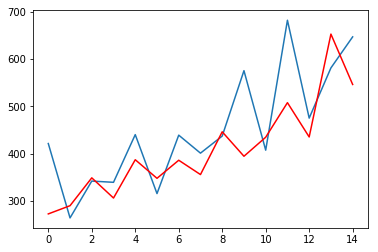

In [14]:
# plot showing the expected values (blue) compared to the rolling forecast predictions (red). 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

We can see the values show some trend and are in the correct scale.